In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# read 데이터
df = pd.read_csv('AFSNT.CSV', encoding="cp949")
df.head()

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,C02,N,NaN
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN


In [45]:
# 비행기 취소와 관련된 Column 삭제
df.drop(columns=['CNL', 'CNR'], axis=1, inplace=True)

# 사용되지 않을 것 같은 데이터 일단 삭제
df.drop(columns=['REG', 'IRR', 'DRR'], axis=1, inplace=True)


In [46]:
# ATT (actual time data)가 널 값인 레코드 삭제
df = df[pd.notnull(df['ATT'])]
df.isnull().sum()

SDT_YY    0
SDT_MM    0
SDT_DD    0
SDT_DY    0
ARP       0
ODP       0
FLO       0
FLT       0
AOD       0
STT       0
ATT       0
DLY       0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987709 entries, 0 to 987708
Data columns (total 12 columns):
SDT_YY    987709 non-null int64
SDT_MM    987709 non-null int64
SDT_DD    987709 non-null int64
SDT_DY    987709 non-null object
ARP       987709 non-null object
ODP       987709 non-null object
FLO       987709 non-null object
FLT       987709 non-null object
AOD       987709 non-null object
STT       987709 non-null object
ATT       987709 non-null object
DLY       987709 non-null object
dtypes: int64(3), object(9)
memory usage: 98.0+ MB


In [48]:
df['SDT_YY'] = df['SDT_YY'].astype('object')
df['SDT_MM'] = df['SDT_MM'].astype('object')
df['SDT_DD'] = df['SDT_DD'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987709 entries, 0 to 987708
Data columns (total 12 columns):
SDT_YY    987709 non-null object
SDT_MM    987709 non-null object
SDT_DD    987709 non-null object
SDT_DY    987709 non-null object
ARP       987709 non-null object
ODP       987709 non-null object
FLO       987709 non-null object
FLT       987709 non-null object
AOD       987709 non-null object
STT       987709 non-null object
ATT       987709 non-null object
DLY       987709 non-null object
dtypes: object(12)
memory usage: 98.0+ MB


In [49]:
df.rename(columns={'SDT_YY':'Year', 'SDT_MM':'Month', 'SDT_DD':'DAY'}, inplace=True)
# 년월일 데이터를 날짜로 변환시킴
df['DAY'] = pd.to_datetime(df[['Year', 'Month', 'DAY']])
# 년, 월 데이터 삭제
df.drop(columns=['Year', 'Month'], axis=1, inplace=True)
print(df['DAY'].size)
df.head(30)

987709


,DAY,SDT_DY,ARP,ODP,FLO,FLT,AOD,STT,ATT,DLY
0,2017-01-01,일,ARP3,ARP6,J,J1955,D,10:05,10:32,N
1,2017-01-01,일,ARP3,ARP6,J,J1954,A,9:30,9:31,N
2,2017-01-01,일,ARP3,ARP6,J,J1956,A,12:45,13:03,N
3,2017-01-01,일,ARP3,ARP6,J,J1957,D,13:25,14:09,Y
4,2017-01-01,일,ARP3,ARP6,J,J1958,A,16:10,16:31,N
5,2017-01-01,일,ARP3,ARP6,J,J1959,D,16:45,17:21,Y
6,2017-01-01,일,ARP3,ARP6,J,J1960,A,19:30,19:43,N
7,2017-01-01,일,ARP3,ARP6,J,J1961,D,20:35,20:52,N
8,2017-01-01,일,ARP2,ARP3,J,J1015,A,17:05,17:03,N
9,2017-01-01,일,ARP1,ARP3,J,J1242,D,20:25,20:36,N


In [51]:
# datetime 연습

# start="23:00:00"
# end="03:00:00"
# dt = datetime.strptime(start,"%H:%M:%S").time()
# dt2 = datetime.strptime(end,"%H:%M:%S").time()
# print(type(dt))
# print (dt, dt2)

# a = datetime.combine(date.today(), dt2) - datetime.combine(date.today(), dt)
# print(a)
# print(a.seconds)


In [52]:
# ARP 경로 파생변수 생성
df['ARPODP'] = df['ARP'] + '_' + df['ODP']
df.head()

,DAY,SDT_DY,ARP,ODP,FLO,FLT,AOD,STT,ATT,DLY,ARPODP
0,2017-01-01,일,ARP3,ARP6,J,J1955,D,10:05,10:32,N,ARP3_ARP6
1,2017-01-01,일,ARP3,ARP6,J,J1954,A,9:30,9:31,N,ARP3_ARP6
2,2017-01-01,일,ARP3,ARP6,J,J1956,A,12:45,13:03,N,ARP3_ARP6
3,2017-01-01,일,ARP3,ARP6,J,J1957,D,13:25,14:09,Y,ARP3_ARP6
4,2017-01-01,일,ARP3,ARP6,J,J1958,A,16:10,16:31,N,ARP3_ARP6


In [53]:
# Categorical data --> one hot encoding

one_hot_dy = pd.get_dummies(df['SDT_DY'])
df = df.drop(['SDT_DY'],axis = 1)
df = df.join(one_hot_dy)

one_hot_arp = pd.get_dummies(df['ARP'])
df = df.drop(['ARP'],axis = 1)
df = df.join(one_hot_arp)

one_hot_flo = pd.get_dummies(df['FLO'])
df = df.drop(['FLO'],axis = 1)
df = df.join(one_hot_flo)

one_hot_odp = pd.get_dummies(df['ODP'])
df = df.drop(['ODP'],axis = 1)
one_hot_odp.rename(columns={'ARP1':'ARP1_','ARP2':'ARP2_','ARP3':'ARP3_','ARP4':'ARP4_','ARP5':'ARP5_',
                            'ARP14':'ARP14_','ARP12':'ARP12_','ARP10':'ARP10_','ARP8':'ARP8_','ARP6':'ARP6_',
                            'ARP15':'ARP15_','ARP13':'ARP13_','ARP11':'ARP11_','ARP9':'ARP9_','ARP7':'ARP7_'
                  }, inplace=True)
df = df.join(one_hot_odp)

one_hot_arpodp = pd.get_dummies(df['ARPODP'])
df = df.drop(['ARPODP'],axis = 1)
df = df.join(one_hot_arpodp)

print(len(df.columns)) 

140


In [54]:
# from datetime import datetime, date

# df_time = df[['STT', 'ATT']]
# df_time['STT'] = pd.to_datetime(df_time['STT'],format= '%H:%M')
# df_time['ATT'] = pd.to_datetime(df_time['ATT'],format= '%H:%M')
# a = df_time['ATT'] - df_time['STT']
# df['Diff'] = a
# df['Diff_'] = df['Diff'].dt.seconds.astype('int64')

from datetime import datetime, date

df['Diff'] = (pd.to_datetime(df['ATT'],format= '%H:%M') - pd.to_datetime(df['STT'],format= '%H:%M')).dt.seconds.astype('int64')
#df['Diff_P'] = (pd.to_datetime(df['ATT'],format= '%H:%M') - pd.to_datetime(df['STT'],format= '%H:%M'))

df.head(10)

,DAY,FLT,AOD,STT,ATT,DLY,금,목,수,월,...,ARP8_ARP15,ARP8_ARP2,ARP8_ARP3,ARP8_ARP7,ARP9_ARP1,ARP9_ARP15,ARP9_ARP2,ARP9_ARP3,ARP9_ARP6,Diff
0,2017-01-01,J1955,D,10:05,10:32,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1620
1,2017-01-01,J1954,A,9:30,9:31,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60
2,2017-01-01,J1956,A,12:45,13:03,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1080
3,2017-01-01,J1957,D,13:25,14:09,Y,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2640
4,2017-01-01,J1958,A,16:10,16:31,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1260
5,2017-01-01,J1959,D,16:45,17:21,Y,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2160
6,2017-01-01,J1960,A,19:30,19:43,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,780
7,2017-01-01,J1961,D,20:35,20:52,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1020
8,2017-01-01,J1015,A,17:05,17:03,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86280
9,2017-01-01,J1242,D,20:25,20:36,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,660


In [55]:
# # 딜레이가 최대 2시간이라고 가정했을 때, --> 즉, 2시간 초과한 딜레이는 wrong값이라 가정
# max_delay_hour = 2
# max_delay = max_delay_hour * 3600 # seconds

# # 출발비행기의 경우, 조금이라도 출발이 빠른 건 wrong data라 판단.
# # -79200 ~ 0 을 가지는 Diff 데이터 wrong 값 처리
# # -79200은 86400 - 7200 ==> 자정 넘어서 나오는 올바른 데이터는 처리하지 않기 위함
# df = df[(((df['Diff'] < -(86400-max_delay)) | (df['Diff']>= 0)) & (df['AOD']=='D')) | (df['AOD']=='A')]
# #df.drop((df['Diff'] > -79200 and df['Diff']< 0 and df['AOD']='D'))

# # 일반 도착 비행기들의 경우, delay 2시간 이상 wrong값 처리 --> 7200
# df = df[df['Diff']<= 7200]
# df.head(100)

In [56]:

# STT와 ATT 격차 큰 순대로 정렬
df = df.sort_values(by=['Diff'], ascending=False)
df.head(20000)
# df2 = df[df['STT'] == '23:50']
# df2.head()

,DAY,FLT,AOD,STT,ATT,DLY,금,목,수,월,...,ARP8_ARP15,ARP8_ARP2,ARP8_ARP3,ARP8_ARP7,ARP9_ARP1,ARP9_ARP15,ARP9_ARP2,ARP9_ARP3,ARP9_ARP6,Diff
851678,2019-01-27,B1802,A,8:55,8:54,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86340
445511,2018-06-09,J1335,A,11:15,11:14,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86340
462218,2018-08-03,J1234,A,14:55,14:54,N,1,0,0,0,...,0,0,0,0,0,0,0,0,0,86340
75887,2017-09-04,J1417,A,17:45,17:44,N,0,0,0,1,...,0,0,0,0,0,0,0,0,0,86340
768312,2018-04-01,L1710,A,12:15,12:14,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86340
628966,2018-06-09,A1902,A,7:50,7:49,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86340
768325,2018-04-01,L1702,A,9:05,9:04,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86340
478591,2018-09-24,J1637,A,21:05,21:04,N,0,0,0,1,...,0,0,0,0,0,0,0,0,0,86340
172274,2017-04-04,F1704,A,22:05,22:04,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86340
628947,2018-06-09,A1962,A,17:30,17:29,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86340


In [57]:
########################################################################출발
# 딜레이가 최대 5시간이라고 가정했을 때, --> 즉, 2시간 초과한 딜레이는 wrong값이라 가정
max_delay_hour = 5
max_delay = max_delay_hour * 3600 # seconds

# 출발비행기의 경우, 조금이라도 출발이 빠른 건 wrong data라 판단.
# 7200보다 큰 값을 가지는 Diff 데이터 wrong 값 처리
df = df[((df['Diff'] <= max_delay) & (df['AOD']=='D')) | (df['AOD']=='A')]

df.head(100)

########################################################################도착
#이정도는 늦게 도착해도 O
#2시간은 예상보다 늦게도착할 수 있다. 그 이상은 말이안된다
max_delay_hour_arr = 5
max_delay_arr = max_delay_hour_arr * 3600 # seconds

#몇분 일찍도착해도 O
#30분은 예상보다 빨리도착할 수 있음. 그거보다 빨리도착하는 건 말이 안됨
min_delay = 30*60
min_delay = 86400 - min_delay  # 86400(24시간)보다 위인거만 살려놓기
df = df[(df['AOD']=='D') |((df['Diff'] <= max_delay_arr) & (df['AOD']=='A')) | ((df['AOD']=='A')& (df['Diff'] >= min_delay )) ]
df.loc[df['Diff'] >=min_delay, 'Diff'] = df.loc[df['Diff'] >=min_delay, 'Diff']  - 86400
df.head(100)

,DAY,FLT,AOD,STT,ATT,DLY,금,목,수,월,...,ARP8_ARP15,ARP8_ARP2,ARP8_ARP3,ARP8_ARP7,ARP9_ARP1,ARP9_ARP15,ARP9_ARP2,ARP9_ARP3,ARP9_ARP6,Diff
851678,2019-01-27,B1802,A,8:55,8:54,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60
445511,2018-06-09,J1335,A,11:15,11:14,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60
462218,2018-08-03,J1234,A,14:55,14:54,N,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-60
75887,2017-09-04,J1417,A,17:45,17:44,N,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-60
768312,2018-04-01,L1710,A,12:15,12:14,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60
628966,2018-06-09,A1902,A,7:50,7:49,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60
768325,2018-04-01,L1702,A,9:05,9:04,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60
478591,2018-09-24,J1637,A,21:05,21:04,N,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-60
172274,2017-04-04,F1704,A,22:05,22:04,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60
628947,2018-06-09,A1962,A,17:30,17:29,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60


['Diff']
**************************************************
All


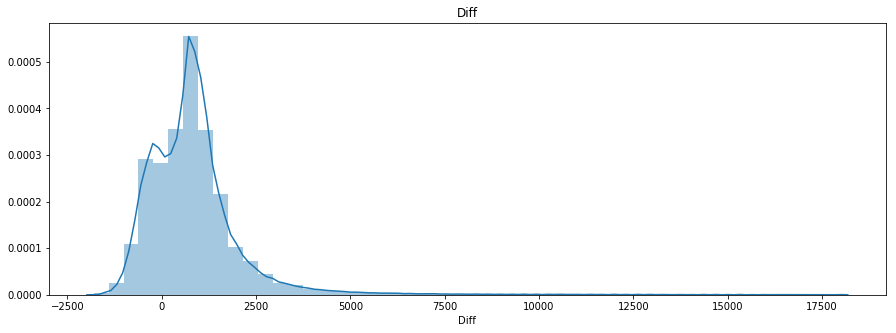

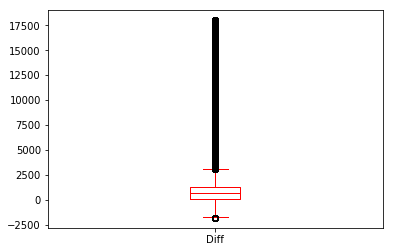

**************************************************
Arrive


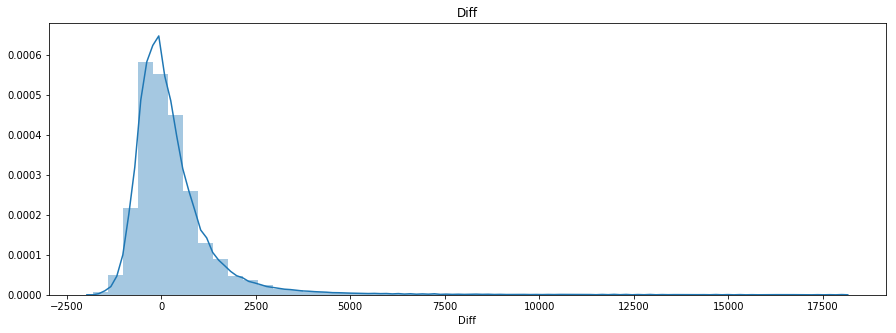

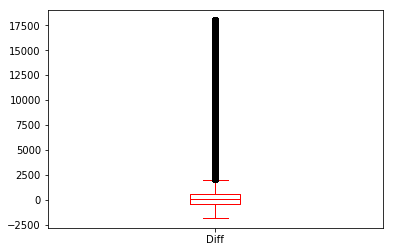

**************************************************
Departure


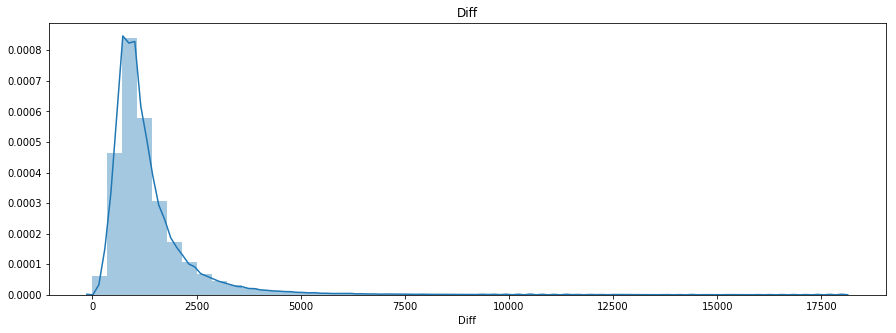

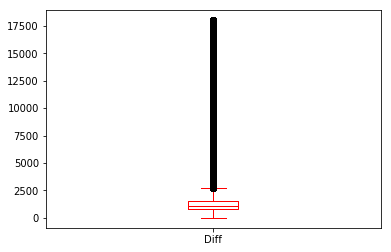

In [58]:
# Check the numerical data
numerical_feature = [col for col in df.columns if df[col].dtypes == 'int64']
print(numerical_feature)

def dist_box(df, feature_list):
    for col in feature_list:
        plt.figure(figsize=(15, 5))
        sns.distplot(df.loc[df[col].notnull(), col])
        plt.title(col)
        plt.show()
        
        df[col].plot(kind='box', color='red')
        plt.show()
        
print('*'*50)
print('All')
dist_box(df, numerical_feature)
print('*'*50)
print('Arrive')
dist_box(df[df['AOD'] == 'A'], numerical_feature)
print('*'*50)
print('Departure')
dist_box(df[df['AOD'] == 'D'], numerical_feature)

In [59]:
# 날짜에서 월 데이터만 추출
df['DAY'] = df['DAY'].dt.month

#df['Diff'] = (pd.to_datetime(df['ATT'],format= '%H:%M') - pd.to_datetime(df['STT'],format= '%H:%M'))
#.dt.seconds.astype('int64')

# 시간에서 시 데이터만 추출
df['ATT'] = pd.to_datetime(df['ATT'],format= '%H:%M').dt.hour
df['STT'] = pd.to_datetime(df['STT'],format= '%H:%M').dt.hour

df.head()

,DAY,FLT,AOD,STT,ATT,DLY,금,목,수,월,...,ARP8_ARP15,ARP8_ARP2,ARP8_ARP3,ARP8_ARP7,ARP9_ARP1,ARP9_ARP15,ARP9_ARP2,ARP9_ARP3,ARP9_ARP6,Diff
851678,1,B1802,A,8,8,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60
445511,6,J1335,A,11,11,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60
462218,8,J1234,A,14,14,N,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-60
75887,9,J1417,A,17,17,N,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-60
768312,4,L1710,A,12,12,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60


In [60]:

# 앞서 못한것 그냥 다시 했고 (위에서하면 중간꺼 오류날까봐...)
one_hot_aod = pd.get_dummies(df['AOD'])
df = df.drop(['AOD'],axis = 1)
one_hot_aod.rename(columns={'A':'Arrive', 'D':'Departure'}, inplace=True)
df = df.join(one_hot_aod)

# 일단 FLT는 처리할 방법이 없어서 삭제해놓음
df.drop(['FLT'], axis=1, inplace = True)


In [61]:
from sklearn import preprocessing

# DLY도 1과 0으로 데이터 처리
le = preprocessing.LabelEncoder()
df[['DLY']] = le.fit_transform(df[['DLY']])
    
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979275 entries, 851678 to 676657
Columns: 141 entries, DAY to Departure
dtypes: int32(1), int64(4), uint8(136)
memory usage: 208.1 MB


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
# X and y variables
X = df.drop(['DLY','ATT','Diff'], axis = 1)
y = df['DLY']

from sklearn.model_selection import train_test_split, KFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 42)

# train, test set 어떻게 잡혔나 확인. 출력.

print("X_train set--------------------")
print("Shape:",X_train.shape)
print("Target:")
print(y_train.value_counts())
print()
      
print("X_test set info-----------------")
print("Shape:",X_test.shape)
print("Target:")
print(y_test.value_counts())

############# 변수 중요도 섹션

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

log_rg = LogisticRegression().fit(X_train, y_train)
cross_val_score(log_rg, X_train, y_train, cv=5)
log_rg.score(X_test, y_test)
print(classification_report(y_test, log_rg.predict(X_test)))

# X column 개수 출력
print(len(X.columns)) 

# 변수 중요도 
feature_importance_lr = pd.DataFrame(zip(X.columns.values, abs(log_rg.coef_.ravel())))
feature_importance_lr.columns = ['feature', 'coef']
feature_importance_lr.sort_values("coef", ascending=False, inplace=True)
feature_importance_lr = feature_importance_lr.reset_index().drop(['index'], axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(feature_importance_lr)

X_train set--------------------
Shape: (685492, 138)
Target:
0    602358
1     83134
Name: DLY, dtype: int64

X_test set info-----------------
Shape: (293783, 138)
Target:
0    258202
1     35581
Name: DLY, dtype: int64


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    258202
           1       0.41      0.00      0.00     35581

   micro avg       0.88      0.88      0.88    293783
   macro avg       0.65      0.50      0.47    293783
weighted avg       0.82      0.88      0.82    293783

138
         feature      coef
0         Arrive  1.353581
1     ARP2_ARP15  1.078554
2     ARP4_ARP15  1.019198
3      ARP7_ARP3  0.955889
4      ARP3_ARP7  0.791240
5          ARP1_  0.652013
6      ARP3_ARP1  0.594891
7     ARP3_ARP15  0.559452
8           ARP1  0.547122
9      ARP1_ARP3  0.546556
10    ARP1_ARP15  0.540021
11     ARP1_ARP8  0.523957
12     ARP2_ARP6  0.510794
13     ARP4_ARP2  0.504369
14     ARP1_ARP2  0.497538
15         ARP3_  0.496981
16     ARP4_ARP3  0.486971
17     ARP2_ARP5  0.485742
18    ARP6_ARP15  0.484816
19          ARP4  0.484170
20     ARP8_ARP7  0.473233
21     ARP5_ARP3  0.466066
22    ARP5_ARP15  0.465383
23             토  0.4

In [ ]:

# # X and y variables
# X = df.drop(['DLY','ATT','Diff'], axis = 1)
# y = df['DLY']

# # re-scale

# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
# #scaler = RobustScaler()
# #scaler = MinMaxScaler()
# scaler = MaxAbsScaler()
# #scaler = StandardScaler()
# X['Diff'] = scaler.fit_transform(X[numerical_feature])

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
# from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
# from sklearn.model_selection import GridSearchCV

# # Algorithmns models to be compared
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from xgboost import XGBClassifier

# # Spliting X and y into train and test version
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state = 42)

# # to feed the random state
# seed = 7

# # prepare models
# models = []
# # models.append(('LR', LogisticRegression()))
# # models.append(('LDA', LinearDiscriminantAnalysis()))
# # models.append(('KNN', KNeighborsClassifier()))
# # models.append(('CART', DecisionTreeClassifier()))
# # models.append(('NB', GaussianNB()))
# # models.append(('RF', RandomForestClassifier()))
# models.append(('SVM', SVC(gamma='auto')))
# models.append(('XGB', XGBClassifier()))

# # evaluate each model in turn
# results = []
# names = []
# scoring = 'recall'

# for name, model in models:
#     # K-Fold
#     kfold = KFold(n_splits=10, random_state=seed)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

#     # Hold out 
#     model.fit(X_train, y_train)
#     y_predict = pd.Series(model.predict(X_test))

#     # Resets index to compare original test data with predicted data
#     y_test = y_test.reset_index(drop=True)
#     y_predict = y_predict.reset_index(drop=True)
    
#     plt.figure(figsize=(15, 5))
#     plt.scatter(range(y_test.shape[0]), y_test, c='gray')
#     plt.scatter(range(y_predict.shape[0]), y_predict , c='r')
#     diff = abs(y_test - y_predict)
#     plt.bar(range(diff.shape[0]), diff, color='gray')
#     plt.title('Result - Original comparsion')
#     plt.legend(['Original', 'Predict'])
#     plt.show()
    
#     print(model.score(X_test, y_test))
#     print('-' * 50)
        
# # boxplot algorithm comparison
# fig = plt.figure(figsize=(11,6))
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

In [ ]:
# # 그냥 정규화 해본 것....
# # 해보았을 때 
# '''
# MIN:  -1680.0 (28분)
# MAX:  2820.0 (47분)
# 이 정규분포 상으로 나옴
# '''

# # remove the outlier of numerical data using IQR
# for col in numerical_feature:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     print('Q1: ', Q1)
#     print('Q3: ', Q3)
#     print(col, IQR)
#     df =  df[(df[col] >= (Q1 - 1.5 * IQR))
#             & (df[col] <= (Q3 + 1.5 * IQR))]
    
#     # df[col] = np.log1p(df[col]) # skewed data 처리
#     # 안하는게 정확도가 제일 높음.  
    
# print('*'*50)
# print('All')
# dist_box(df, numerical_feature)
# print('*'*50)
# print('Arrive')
# dist_box(df[df['AOD'] == 'A'], numerical_feature)
# print('*'*50)
# print('Departure')
# dist_box(df[df['AOD'] == 'D'], numerical_feature)

# print('MIN: ', min(df['Diff']))
# print('MAX: ', max(df['Diff']))


# df.info() #932136개 데이터
